In [ ]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

In [ ]:
data=pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y=data['Outcome']
X=data.drop(['Outcome'], axis=1)

Y.shape, X.shape


((768,), (768, 8))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.85,random_state=42, stratify=Y)

In [ ]:
xtrain.isnull().sum()  # checks for every value if null or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
xtrain['Insulin'].value_counts()

0.000      310
323.125     23
130.000      9
105.000      9
140.000      8
          ... 
188.000      1
280.000      1
99.000       1
53.000       1
258.000      1
Name: Insulin, Length: 147, dtype: int64

In [ ]:
xtrain['BMI'].value_counts()

323.125    23
32.400     10
31.600     10
32.000     10
0.000       9
           ..
32.600      1
44.200      1
36.000      1
37.000      1
42.600      1
Name: BMI, Length: 235, dtype: int64

In [ ]:
xtrain['BloodPressure'].value_counts()

74.000     47
70.000     45
78.000     40
80.000     37
72.000     36
64.000     36
68.000     35
60.000     33
76.000     28
66.000     26
62.000     25
88.000     24
0.000      24
82.000     23
323.125    23
86.000     19
84.000     18
58.000     17
90.000     17
56.000     12
54.000     10
50.000      9
52.000      7
75.000      6
92.000      6
65.000      5
85.000      5
48.000      5
96.000      4
44.000      4
110.000     3
106.000     3
100.000     2
108.000     2
30.000      2
55.000      2
98.000      2
114.000     1
24.000      1
104.000     1
46.000      1
122.000     1
61.000      1
40.000      1
102.000     1
94.000      1
38.000      1
Name: BloodPressure, dtype: int64

<Axes: >

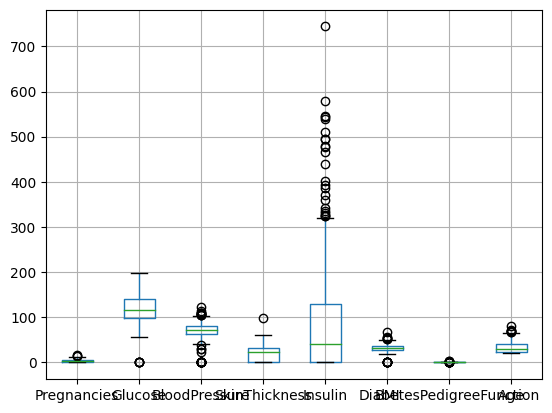

In [ ]:
xtrain.boxplot()

<Axes: >

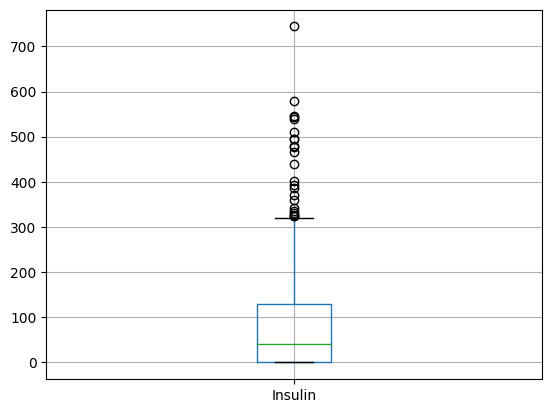

In [ ]:
xtrain.boxplot('Insulin')  # before treatment

In [ ]:
Q1 = xtrain['Insulin'].quantile(0.25)
Q3 = xtrain['Insulin'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 129.25 | IQR: 129.25 | LL: -193.875 | UL: 323.125


In [ ]:
ul_out_count = xtrain[xtrain['Insulin'] > UL].shape[0]
ll_out_count = xtrain[xtrain['Insulin'] < LL].shape[0]

total_out_count = ul_out_count + ll_out_count

total_out_perc = total_out_count * 100 / xtrain.shape[0]

print("UL#: {} | LL#: {} | Total#: {} | Total%: {}".format(ul_out_count,ll_out_count,total_out_count,total_out_perc))

UL#: 23 | LL#: 0 | Total#: 23 | Total%: 3.5276073619631902


In [ ]:
xtrain.loc[xtrain['Insulin'] > UL] = UL
xtrain.loc[xtrain['Insulin'] < LL] = LL

<Axes: >

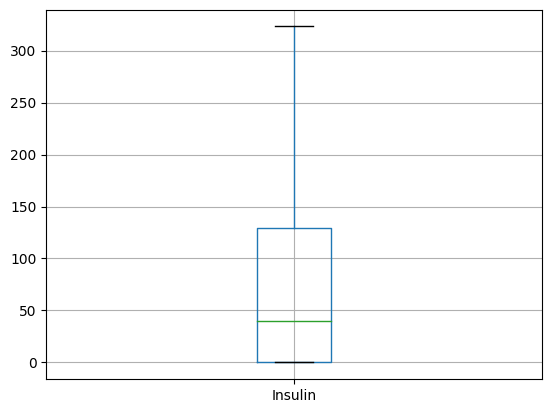

In [ ]:
xtrain.boxplot('Insulin')  # after treatment

In [ ]:
xtrain.shape, xtest.shape

((652, 8), (116, 8))

In [ ]:
xtest.boxplot('Insulin')  # before treatment

In [ ]:
Q1 = xtest['Insulin'].quantile(0.25)
Q3 = xtest['Insulin'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 115.0 | IQR: 115.0 | LL: -172.5 | UL: 287.5


In [ ]:
ul_out_count = xtest[xtest['Insulin'] > UL].shape[0]
ll_out_count = xtest[xtest['Insulin'] < LL].shape[0]

total_out_count = ul_out_count + ll_out_count

total_out_perc = total_out_count * 100 / xtest.shape[0]

print("UL#: {} | LL#: {} | Total#: {} | Total%: {}".format(ul_out_count,ll_out_count,total_out_count,total_out_perc))

UL#: 11 | LL#: 0 | Total#: 11 | Total%: 9.482758620689655


In [ ]:
xtest.loc[xtest['Insulin'] > UL] = UL
xtest.loc[xtest['Insulin'] < LL] = LL

<Axes: >

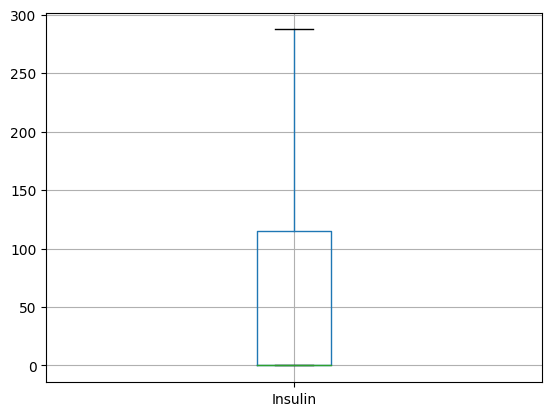

In [ ]:
xtest.boxplot('Insulin')

In [ ]:
xtest.shape

(116, 8)

In [ ]:
xtrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,15.107170,126.532017,78.532017,30.852569,73.711465,42.123428,11.850844,43.544287
std,59.038206,48.655890,50.207596,58.024442,91.625790,54.316885,59.569074,54.731452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.475000,0.247000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.400000,0.391000,30.000000
75%,6.000000,141.000000,80.000000,33.000000,129.250000,37.125000,0.662000,41.250000
max,323.125000,323.125000,323.125000,323.125000,323.125000,323.125000,323.125000,323.125000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
print('Accuracy Score:')
print(metrics.accuracy_score(ytest,y_pred))

Accuracy Score:
0.7155172413793104


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # Import SimpleImputer instead of Imputer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [ ]:
# Apply Algorithm - RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(xtrain, ytrain.ravel())
predict_train_data = random_forest_model.predict(xtest)

In [ ]:
# Evaluate the model
accuracy = metrics.accuracy_score(ytest, predict_train_data)
print("Random Forest Model Accuracy: {:.3f}".format(accuracy))

Random Forest Model Accuracy: 0.793


In [ ]:
# Hyperparameter optimization using RandomizedSearchCV for XGBoost
params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}


In [ ]:
classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,
                                   scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [ ]:
start_time = datetime.now()
random_search.fit(X, Y.ravel())
print('\nTime taken:', datetime.now() - start_time)

# Best hyperparameters for XGBoost
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Time taken: 0:00:04.394651


In [ ]:
# Cross-validation score for XGBoost
cross_val_scores = cross_val_score(best_xgb_model, X, Y.ravel(), cv=10)
print("XGBoost Cross-Validation Scores:\n", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

XGBoost Cross-Validation Scores:
 [0.71428571 0.76623377 0.74025974 0.67532468 0.72727273 0.75324675
 0.81818182 0.81818182 0.77631579 0.80263158]
Mean Cross-Validation Score: 0.7591934381408065
